In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

In [3]:
import zipfile
local_path='./archive.zip'
zip_ref=zipfile.ZipFile(local_path,'r')
zip_ref.extractall('./MRI Scans')
zip_ref.close()

In [5]:
import os
train_dir=os.path.join('./MRI Scans/training')
test_dir=os.path.join('./MRI Scans/testing')

In [8]:
model=Sequential([Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                 MaxPooling2D(2,2),
                 Conv2D(64,(3,3), activation='relu'),
                 MaxPooling2D(2,2),
                 Conv2D(64,(3,3), activation='relu'),
                 MaxPooling2D(2,2),
                 Conv2D(64,(3,3), activation='relu'),
                 MaxPooling2D(2,2),
                 Flatten(),
                 Dropout(0.5),
                 Dense(512,activation='relu'),
                 Dense(4, activation='softmax')])
model.build()

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 64)       

In [10]:
model.compile(loss=CategoricalCrossentropy(),
             optimizer=Adam(),
             metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1.0/255)
test_gen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_gen.flow_from_directory(train_dir,
                                             target_size=(150,150),
                                             batch_size=50,
                                             class_mode='categorical')

test_generator=test_gen.flow_from_directory(test_dir,
                                             target_size=(150,150),
                                             batch_size=50,
                                             class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [13]:
history=model.fit(train_generator, steps_per_epoch=25, epochs=20,validation_data=test_generator)

Epoch 1/20
25/25 [==============================] - 12s 480ms/step - loss: 0.4210 - accuracy: 0.8380 - val_loss: 0.4460 - val_accuracy: 0.8024
Epoch 2/20
25/25 [==============================] - 12s 504ms/step - loss: 0.4279 - accuracy: 0.8340 - val_loss: 0.4450 - val_accuracy: 0.8093
Epoch 3/20
25/25 [==============================] - 12s 502ms/step - loss: 0.3824 - accuracy: 0.8760 - val_loss: 0.4303 - val_accuracy: 0.8177
Epoch 4/20
25/25 [==============================] - 13s 508ms/step - loss: 0.3435 - accuracy: 0.8800 - val_loss: 0.4817 - val_accuracy: 0.8223
Epoch 5/20
25/25 [==============================] - 12s 493ms/step - loss: 0.4121 - accuracy: 0.8300 - val_loss: 0.4060 - val_accuracy: 0.8352
Epoch 6/20
25/25 [==============================] - 12s 487ms/step - loss: 0.3518 - accuracy: 0.8679 - val_loss: 0.4764 - val_accuracy: 0.8009
Epoch 7/20
25/25 [==============================] - 14s 562ms/step - loss: 0.3089 - accuracy: 0.8740 - val_loss: 0.3998 - val_accuracy: 0.8322

In [16]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Assuming your file is in the same directory as the Jupyter Notebook
file_name = 'Te-pi_0010.jpg'  # Replace with the actual file name

# Construct the path to the file
path = os.path.join(os.getcwd(), file_name)

# Predicting images
img = image.load_img(path, target_size=(150, 150)) #dimensions match huna parcha
x = image.img_to_array(img)
x=x/255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes) #alphabetical hunchha, glioma, meningioma, notumor, pituitary

1/1 [==============================] - 0s 33ms/step
[[2.1147344e-04 7.0665658e-02 2.7944296e-04 9.2884344e-01]]


<Figure size 640x480 with 0 Axes>

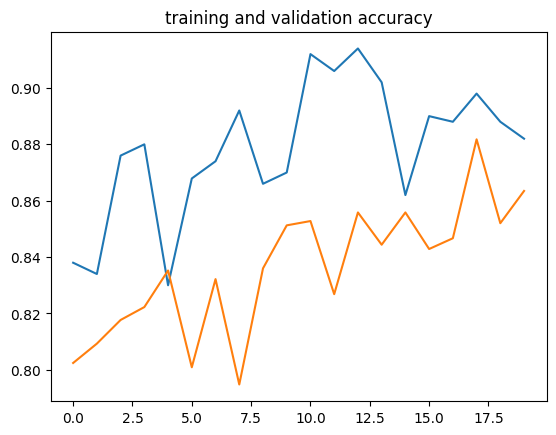

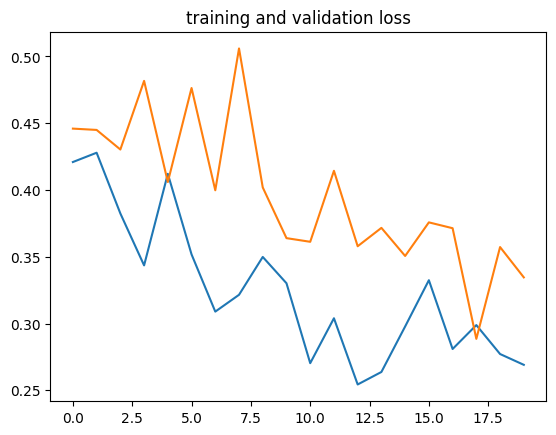

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs,val_acc)
plt.title('training and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training and validation loss')
plt.figure()

In [22]:
import tensorflow
class Mycallbacks(tensorflow.keras.callbacks.Callback):
    def on_epochs_end(self,epoch, logs={}):
        if (logs.get('val_accuracy')>0.90):
            self.model.stop_training=True
            print("accuracy exceeded 90")
callbacks=Mycallbacks()              